# Loading in our data from main.ipynb to build the deeper model

### Loading the data

In [30]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
class_weights_dict = data["class_weights"]
num_classes = data["num_classes"]

### Data Augmentation

In [31]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [32]:
def build_cnn(num_classes):
    model = Sequential([
        Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(64, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Conv2D(128, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Conv2D(256, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

### Parameters

In [33]:
model = build_cnn(num_classes)

optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,261,016 (12.44 MB)

 Trainable params: 3,258,200 (12.43 MB)

 Non-trainable params: 2,816 (11.00 KB)

### Data augmentation

In [34]:
batch_size = 64
epochs = 40

### Training the model

In [ ]:
print("Training the model...")

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict,
    shuffle=True,
    verbose=1
)

print("Evaluating on test set...")

test_loss, test_accuracy = model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    verbose=1
)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Training the model...
Epoch 1/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.2378 - loss: 2.4538 - val_accuracy: 0.4598 - val_loss: 1.7492
Epoch 2/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4406 - loss: 1.5653 - val_accuracy: 0.4686 - val_loss: 1.7921
Epoch 3/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5419 - loss: 1.2454 - val_accuracy: 0.5569 - val_loss: 1.3709
Epoch 4/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6000 - loss: 1.0819 - val_accuracy: 0.5798 - val_loss: 1.3157
Epoch 5/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6395 - loss: 0.9734 - val_accuracy: 0.5510 - val_loss: 1.5791
Epoch 6/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6842 - loss: 0.8291 - val_accuracy: 0.6519 - val_loss: 1.0916
Epoch 7/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7101 - loss: 0.7347 - val_accuracy: 0.5965 - val_loss: 1.3251
Epoch 8/40
640/640 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.

### Plotting Training History

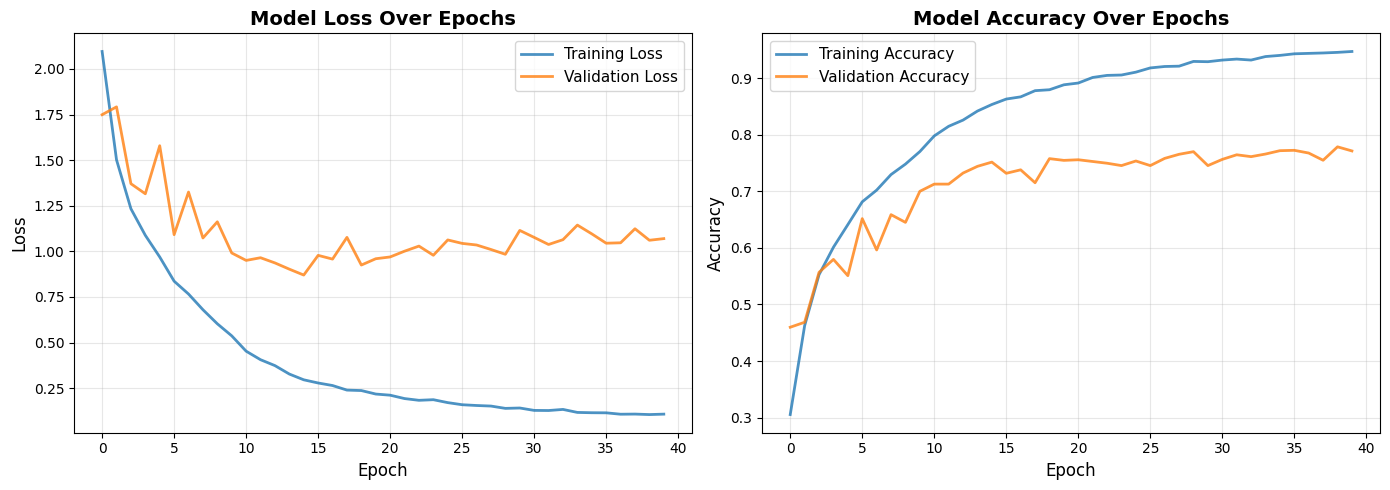

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# loss
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2, alpha=0.8)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, alpha=0.8)
ax1.set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, alpha=0.8)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, alpha=0.8)
ax2.set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Testing with images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


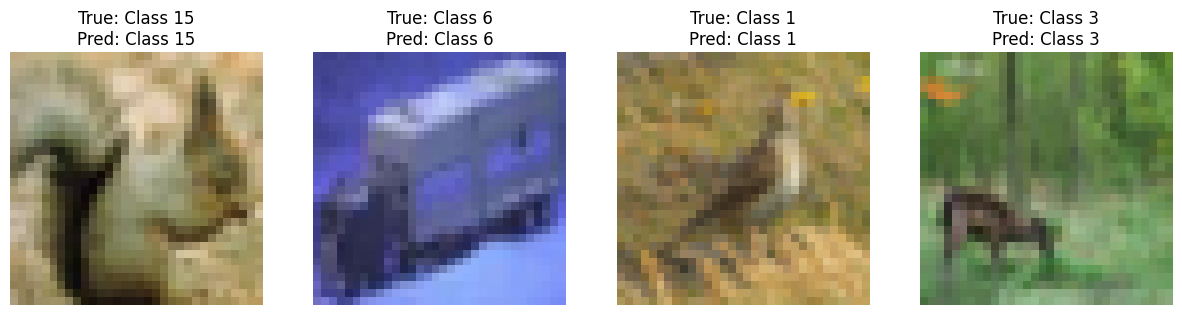

In [37]:
class_names = [f"Class {i}" for i in range(num_classes)]

num_samples = 4
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    image = X_test[idx]
    true_label = y_test[idx]

    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred_probs)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")

plt.show()
